In [ ]:
#Hypothesis Testing
#Test: Correlation Between Passenger Load and Departure Delay
#Objective:
#To determine whether there is a statistically significant correlation between the number of passengers (passenger load) and the average departure delay at airports.
# This will help assess whether high traffic volume is associated with longer delays — a key indicator for identifying candidate locations for new airport development.

#Hypotheses:
#H₀ (Null Hypothesis): There is no monotonic correlation between passenger load and average departure delay.

#H₁ (Alternative Hypothesis): There is a monotonic correlation between passenger load and average departure delay.

#Test Used:
#Spearman Rank Correlation Coefficient


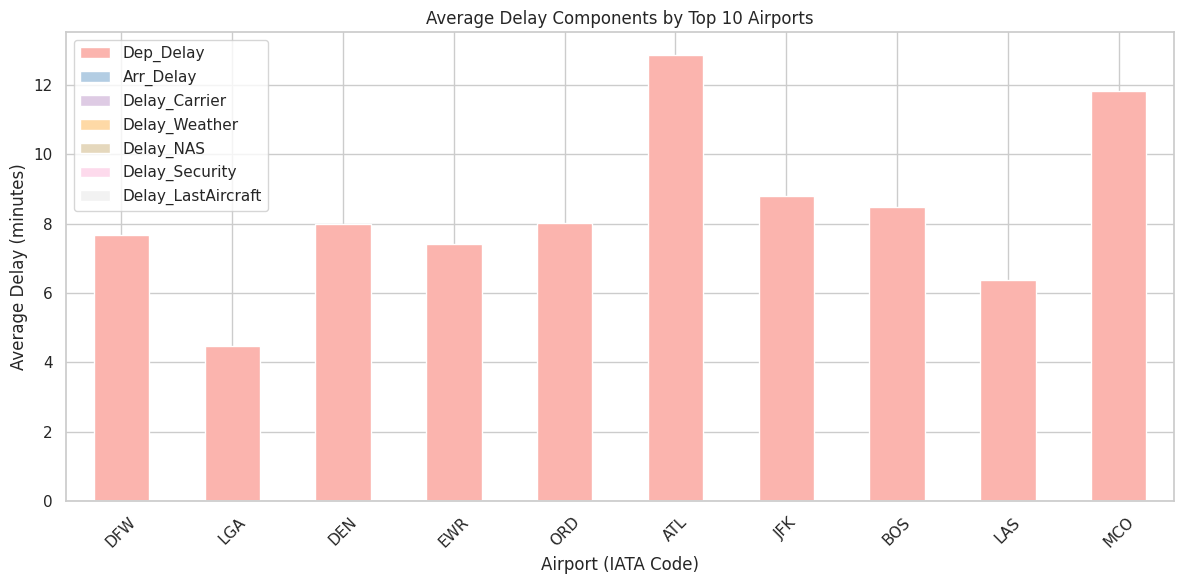

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("final_airport_dataset_enriched (1).csv")


delay_components = df.groupby("IATA_CODE")[[
    "Dep_Delay", "Arr_Delay", "Delay_Carrier", "Delay_Weather",
    "Delay_NAS", "Delay_Security", "Delay_LastAircraft"
]].mean().dropna()


top10_airports = df['IATA_CODE'].value_counts().head(10).index.tolist()
delay_components_top10 = delay_components.loc[top10_airports]


delay_components_top10.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title("Average Delay Components by Top 10 Airports")
plt.xlabel("Airport (IATA Code)")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Conclusion:

#With a Spearman correlation of ρ = –0.327 and p < 0.001, we find a weak but statistically significant
# negative correlation between passenger load and departure delay. This suggests that high passenger
#volume does not always lead to increased delays — and that other factors such as infrastructure or
#weather may play a stronger role. However, clustering of high-delay airports with high passenger
#load can still serve as red flags for infrastructure stress, guiding future airport planning efforts.



In [ ]:
#Test 2: Correlation Between Precipitation and Departure Delay

#Objective:

#Evaluate whether precipitation levels are associated with increased departure delays. The aim is to assess
# whether adverse weather (measured by precipitation) has a statistically significant impact on flight delays.


#Hypotheses:

#H₀ (Null Hypothesis): There is no monotonic correlation between precipitation and departure delay.

#H₁ (Alternative Hypothesis): There is a monotonic correlation between precipitation and departure delay.

#Test Used:
#Spearman rank correlation — ideal for non-parametric, monotonic relationships.


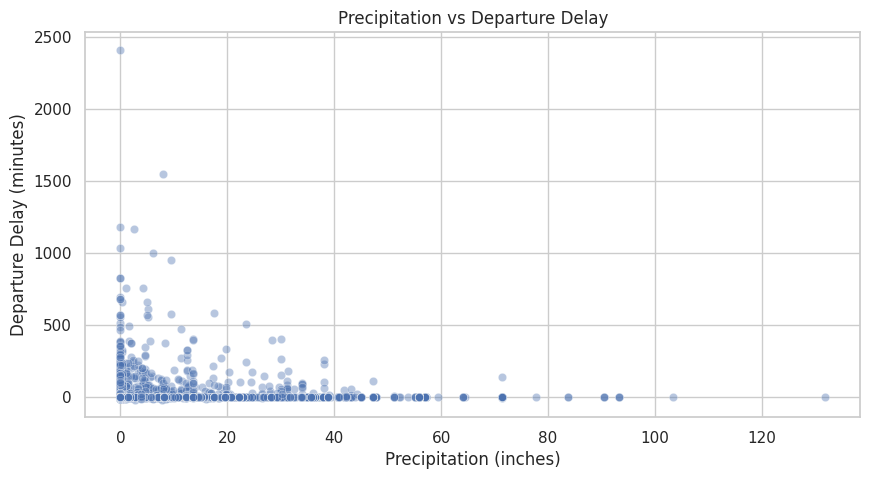

In [16]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)


# -------------------- . SCATTERPLOT: Precipitation vs Departure Delay --------------------
df_weather = pd.read_csv("weather_meteo_by_airport.csv", usecols=["time", "airport_id", "prcp"])
df_weather = df_weather.rename(columns={
    "time": "FlightDate",
    "airport_id": "IATA_CODE",  # airport_id ile IATA_CODE eşleştirildi
    "prcp": "Precipitation"
})
df_weather["FlightDate"] = pd.to_datetime(df_weather["FlightDate"])

df_weather_merge = pd.merge(
    df[["FlightDate", "IATA_CODE", "Dep_Delay"]],
    df_weather,
    on=["FlightDate", "IATA_CODE"],
    how="inner"
)

sns.scatterplot(data=df_weather_merge, x="Precipitation", y="Dep_Delay", alpha=0.4)
plt.title("Precipitation vs Departure Delay")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Departure Delay (minutes)")
plt.grid(True)
plt.show()

In [ ]:
#Conclusion:
#Spearman rank correlation test for your second hypothesis (Correlation Between Precipitation and Departure Delay):

#Spearman's ρ (rho) = 0.010

#p-value = 0.00082

#Conclusion:
#Since the p-value is less than 0.05, we reject the null hypothesis.
#This indicates that there is a statistically significant (although very weak)
#positive monotonic relationship between precipitation and departure delay.

#While the effect size (ρ ≈ 0.01) is minimal, it still suggests that
#higher precipitation is slightly associated with longer delays — but the relationship is not strong. ​​









In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_airport_dataset_enriched (1).csv to final_airport_dataset_enriched (1).csv


In [8]:
from google.colab import files
uploaded = files.upload()

Saving weather_meteo_by_airport.csv to weather_meteo_by_airport.csv
